<a href="https://colab.research.google.com/github/padmapraba/AutoCat/blob/main/Auto_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install build-essential swig 

In [ ]:
!pip install auto-sklearn

In [ ]:
!pip install --upgrade scipy==1.7.1

In [ ]:
import sklearn.metrics
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_moons, make_circles, make_classification
import numpy as np

import autosklearn.classification



# Circles: Data Loading

In [ ]:
# Circles dataset
circles_X, circles_y = sklearn.datasets.make_circles(noise=0.2, random_state=1, factor=0.5)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(circles_X,circles_y,random_state=31)


# Circles: Build and fit a classifier

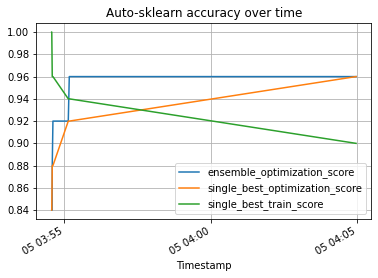

In [ ]:
circle = autosklearn.classification.AutoSklearnClassifier()
circle.fit(X_train, y_train)

circle.cv_results_  # returns dictionary with keys as col headers and values as columns

# returns a dataframe containing the models performance over time
circle.performance_over_time_.plot(
    x='Timestamp',
    kind='line',
    legend=True,
    title='Auto-sklearn accuracy over time',
    grid=True,
)


In [ ]:
# gives the name of the dataset, the metric used and the best validation score obtained
circle.sprint_statistics()


'auto-sklearn results:\n  Dataset name: 60a4a358-69b9-11ec-8f04-0242ac1c0002\n  Metric: accuracy\n  Best validation score: 0.960000\n  Number of target algorithm runs: 517\n  Number of successful target algorithm runs: 504\n  Number of crashed target algorithm runs: 12\n  Number of target algorithms that exceeded the time limit: 1\n  Number of target algorithms that exceeded the memory limit: 0\n'

In [ ]:
# display all models created
circle.show_models()

"[(0.060000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'mlp', 'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'feature_agglomeration', 'classifier:mlp:activation': 'relu', 'classifier:mlp:alpha': 0.00022634813388862197, 'classifier:mlp:batch_size': 'auto', 'classifier:mlp:beta_1': 0.9, 'classifier:mlp:beta_2': 0.999, 'classifier:mlp:early_stopping': 'valid', 'classifier:mlp:epsilon': 1e-08, 'classifier:mlp:hidden_layer_depth': 2, 'classifier:mlp:learning_rate_init': 0.0013640576366551122, 'classifier:mlp:n_iter_no_change': 32, 'classifier:mlp:num_nodes_per_layer': 88, 'classifier:mlp:shuffle': 'True', 'classifier:mlp:solver': 'adam', 'classifier:mlp:tol': 0.0001, 'data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessor:feature_type:

In [ ]:
pred_prob_circle = circle.predict_proba(X_test)

predictions = circle.predict(X_test)
print("Accuracy score:", sklearn.metrics.accuracy_score(y_test, predictions))

Accuracy score: 0.88


In [ ]:
# ROC curve for best circle model
fpr_circ, tpr_circ, tresh_circ = roc_curve(y_test, pred_prob_circle[:,1],pos_label =1)

# AUC Score
auc_score_circ = roc_auc_score(y_test, pred_prob_circle[:,1])


# Circles: View the models found by auto-sklearn

In [ ]:
print(circle.leaderboard())

          rank  ensemble_weight type  cost  duration
model_id                                            
150          1             0.04  mlp  0.04  1.028260
459          2             0.02  mlp  0.04  1.273247
453          3             0.02  mlp  0.04  1.289485
448          4             0.04  mlp  0.04  1.225662
445          5             0.04  mlp  0.04  1.271971
431          6             0.04  mlp  0.04  1.094227
418          7             0.02  mlp  0.04  1.246623
403          8             0.04  mlp  0.04  1.081123
402          9             0.02  mlp  0.04  1.238528
397         10             0.02  mlp  0.04  1.454403
387         11             0.02  mlp  0.04  1.098489
386         12             0.02  mlp  0.04  1.294293
378         13             0.04  mlp  0.04  1.343795
366         14             0.04  mlp  0.04  1.233402
354         15             0.04  mlp  0.04  1.222040
464         16             0.02  mlp  0.04  1.232230
342         17             0.02  mlp  0.04  1.

In [ ]:
#print(cls.show_models())

In [ ]:
predictions = circle.predict(X_test)
print("Accuracy score:", sklearn.metrics.accuracy_score(y_test, predictions))

Accuracy score: 0.88


# Moon Dataset

In [ ]:
# Moons dataset
moon_X, moon_y = sklearn.datasets.make_moons(noise=0.3, random_state=0)
X_moon_train, X_moon_test, y_moon_train, y_moon_test = sklearn.model_selection.train_test_split(moon_X,moon_y,random_state=31)

# 
moon = autosklearn.classification.AutoSklearnClassifier()
moon.fit(X_moon_train, y_moon_train)

pred_prob_moon = moon.predict_proba(X_moon_test)

# ROC and AUC curve for best moon model
fpr_moon, tpr_moon, tresh_moon = roc_curve(y_moon_test, pred_prob_moon[:,1],pos_label =1)
auc_score_moon = roc_auc_score(y_moon_test, pred_prob_moon[:,1])

# 
pred = moon.predict(X_moon_test)
print("Accuracy score:", sklearn.metrics.accuracy_score(y_moon_test, pred))

Accuracy score: 0.8


In [ ]:
print(moon.leaderboard())

          rank  ensemble_weight           type  cost  duration
model_id                                                      
2            1             0.04  random_forest  0.04  1.910229
204          2             0.02  random_forest  0.04  1.758544
202          3             0.02  random_forest  0.04  2.161933
198          4             0.04  random_forest  0.04  1.920479
195          5             0.04  random_forest  0.04  2.202078
186          6             0.04  random_forest  0.04  2.079329
174          7             0.02  random_forest  0.04  2.122981
164          8             0.04  random_forest  0.04  2.162659
162          9             0.02  random_forest  0.04  2.081647
150         10             0.02  random_forest  0.04  2.129200
136         11             0.02  random_forest  0.04  2.247468
128         12             0.02  random_forest  0.04  1.922426
127         13             0.04  random_forest  0.04  1.881563
125         14             0.04  random_forest  0.04  1

# Linearly Separable

In [ ]:
# linearly separable
lin_X, lin_y = make_classification(
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=1,
)
rng = np.random.RandomState(2)
lin_X += 2 * rng.uniform(size=lin_X.shape)

X_lin_train, X_lin_test, y_lin_train, y_lin_test = sklearn.model_selection.train_test_split(lin_X,lin_y,random_state=31)


In [ ]:
linear = autosklearn.classification.AutoSklearnClassifier()
linear.fit(X_lin_train, y_lin_train)

# linear.cv_results_  # returns dictionary with keys as col headers and values as columns

# # returns a dataframe containing the models performance over time
# linear.performance_over_time_.plot(
#     x='Timestamp',
#     kind='line',
#     legend=True,
#     title='Auto-sklearn accuracy over time',
#     grid=True,
# )


AutoSklearnClassifier(per_run_time_limit=360)

In [ ]:
predictions = linear.predict(X_test)
print("Accuracy score:", sklearn.metrics.accuracy_score(y_lin_test, predictions))


In [ ]:
pred_prob_lin = linear.predict_proba(X_lin_test)

# ROC and AUC curve for best moon model
fpr_lin, tpr_lin, tresh_lin = roc_curve(y_lin_test, pred_prob_lin[:,1],pos_label =1)
auc_score_lin = roc_auc_score(y_lin_test, pred_prob_lin[:,1])


# Breast Cancer Dataset 

In [ ]:
X, y = load_breast_cancer(return_X_y=True)
X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = sklearn.model_selection.train_test_split(X, y, stratify=y, random_state=0)

In [ ]:
cancer = autosklearn.classification.AutoSklearnClassifier()
cancer.fit(X_cancer_train, y_cancer_train)

predictions = cancer.predict(X_cancer_test)
print("Accuracy score:", sklearn.metrics.accuracy_score(y_cancer_test, predictions))

pred_prob_cancer = cancer.predict_proba(X_cancer_test)



In [ ]:
# ROC and AUC curve for best moon model
fpr_cancer, tpr_cancer, tresh_cancer = roc_curve(y_cancer_test, pred_prob_cancer[:,1],pos_label =1)
auc_score_cancer = roc_auc_score(y_cancer_test, pred_prob_cancer[:,1])


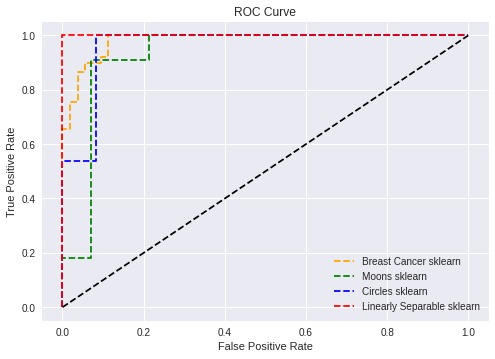

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')


# roc curve for tpr = fpr 
rand_prob= [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, rand_prob,pos_label=1)


# plot roc curves
plt.plot(fpr_cancer, tpr_cancer, linestyle='--', color='orange',label= 'Breast Cancer sklearn')
plt.plot(fpr_moon, tpr_moon, linestyle='--', color='green',label= 'Moons sklearn')
plt.plot(fpr_circ, tpr_circ, linestyle='--', color='blue',label= 'Circles sklearn')
plt.plot(fpr_lin, tpr_lin, linestyle='--', color='red',label= 'Linearly Separable sklearn')
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='best')
plt.show()
